# Neural Networks: Hand Sign Detection
### Welcome to homework 2  &#128522;&#9996;

We will start by loading the packages:

In [1]:
import os
import string
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

Then, Unzip the data:
(مسیر فایل را با توجه محیط متفاوت اجرا تغییر داده ام)

<div dir='rtl'style="text-align: right;font-family:verdana;">
از آنجایی که من در حال توسعه در محیط Kaggle هستم، شیوه گرفتن ورودی متفاوت است.
<br />
در ابتدا فایل زیپ به عنوان دیتا ست باید آپلود شود و سپس خودش فایل را باز خواهد کرد.
<br />
موردی که ما خواهیم داشت، فایل های باز شده است که به عنوان داده ورودی به نوت بوک داده ایم.
<br />
</div>

In [2]:
# with zipfile.ZipFile('/kaggle/input/iut-dl-02.zip', 'r') as zip_ref:
#     zip_ref.extractall('./data')

and Normalize the data before feeding to model:

In [3]:
train_datagen = ImageDataGenerator(rescale = 1/255, validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1/255)

After, we load the dataset:

In [4]:
train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/iut-dl-02/Train',
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "sparse",
    color_mode='grayscale',
    subset = 'training'
    )

validation_generator = train_datagen.flow_from_directory(
    '/kaggle/input/iut-dl-02/Train',
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "sparse",
    color_mode='grayscale',
    subset = 'validation'
    )

test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/iut-dl-02/Test',
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "sparse",
    color_mode='grayscale'
    )

Found 21974 images belonging to 24 classes.
Found 5481 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


The input data are from different 24 classes excluding J and Z:

In [5]:
classes = [char for char in string.ascii_uppercase if char != "J" if char != "Z"]
print(classes, end = " ")

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y'] 

Now, take a look at some examples of images in the dataset. Feel free to change the value of array range and re-run to see different examples.

In [6]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img[:,:,0])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

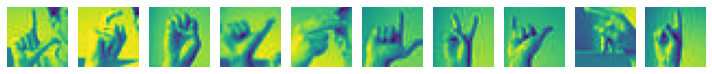

[10. 22.  4. 23.  7. 10. 20. 23. 14.  9.]


In [7]:
sample_training_images, sample_training_labels = next(train_generator)
plotImages(sample_training_images[:10])
print(sample_training_labels[:10])

From now implement your model.
<br>
Please add cells and explain yours developing steps and your results.

<div dir='rtl'style="text-align: right;font-family:verdana;">
برای توضیحات از زبان فارسی استفاده نمایید.
<br>
موفق باشید

</div>

<div dir='rtl'style="text-align: right;font-family:verdana;">
در اینجا ما از GPU نیز می توانیم استفاده کنیم تا سرعت اجرا افزایش پیدا کند.
<br />
همچنین، از Keras و Tensorflow استفاده کرده ایم.
</div>

In [8]:
import tensorflow as tf
import keras
from keras.callbacks import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import *
from keras import backend as K

In [9]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

<div dir='rtl'style="text-align: right;font-family:verdana;">
از آنجایی که دیتاست داده شده، دیتاست مشهوری میباشد، بهترین شبکه برای آن شبکه ای با فعال سازهای ReLU در لایه های میانی و فعال ساز SoftMax در لایه آخر است.
<br />
</div>

In [10]:
model=Sequential([])

model.add(Conv2D(64, (3, 3), activation = "relu", input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation = "relu", input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation = "relu"))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256, activation = "relu"))
model.add(BatchNormalization())
model.add(Dense(26, activation = "softmax"))

model.save_weights('model.h5')

<div dir='rtl'style="text-align: right;font-family:verdana;">
در توضیح مدل میتوانیم ببینیم که بیش از 800 هزار پارامتر داریم که حدود 5000 تای آنها غیر قابل آموزش و ما بقی قابل آموزش است. 
<br />
</div>

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 10, 10, 128)       5

<div dir='rtl'style="text-align: right;font-family:verdana;">
بهترین دقتی که برای این دیتاست پیدا شده دقت 99.5 درصد است و اگر ما دقتی در حد یا بیشتر پیدا کردیم میتوانیم آموزش را متوقف کنیم.
    <br />
    به این صورت امکان overfitting وجود نخواهد داشت.
</div>

In [12]:
class stopTraining(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.995):
      print("over 99% accuracy")
      self.model.stop_training = True
callback=stopTraining()

<div dir='rtl'style="text-align: right;font-family:verdana;">
برای کامپایل مدل از تابع هزینه sparse_categorical_crossentropy به خاطر مسئله چند کلاسه بودن استفاده میکنیم
<br />
تابع بهینه ساز آدام استفاده میکنیم
<br />
معیار کارایی نیز دقت خواهد بود که به تعداد عکس ها با دسته بندی اشتباه اشاره خواهد کرد.
<br />
</div>

<div dir='rtl'style="text-align: right;font-family:verdana;">
برای توقف نوسان در یادگیری و بالا و پایین رفتن دقت، در هر epoch نرخ یادگیری را کاهش میدهیم.
</div>

SGD
Epoch 1/50
172/172 [==============================] - 64s 372ms/step - loss: 2.0949 - acc: 0.4219 - accuracy: 0.4219 - f1_m: 9.7170 - precision_m: 51.5119 - recall_m: 5.6580 - val_loss: 3.3506 - val_acc: 0.0564 - val_accuracy: 0.0564 - val_f1_m: 18.4290 - val_precision_m: 11256976384.0000 - val_recall_m: 9.2145
Epoch 2/50
172/172 [==============================] - 18s 104ms/step - loss: 0.9559 - acc: 0.7861 - accuracy: 0.7861 - f1_m: 5.3619 - precision_m: 8.1035 - recall_m: 4.0492 - val_loss: 2.9562 - val_acc: 0.1166 - val_accuracy: 0.1166 - val_f1_m: 15.2992 - val_precision_m: 9350000640.0000 - val_recall_m: 7.6496
Epoch 3/50
172/172 [==============================] - 17s 101ms/step - loss: 0.6118 - acc: 0.8983 - accuracy: 0.8983 - f1_m: 3.7530 - precision_m: 4.5054 - recall_m: 3.2258 - val_loss: 1.5800 - val_acc: 0.6077 - val_accuracy: 0.6077 - val_f1_m: 10.1988 - val_precision_m: 44.3932 - val_recall_m: 5.8103
Epoch 4/50
172/172 [==============================] - 17s 99ms/step -

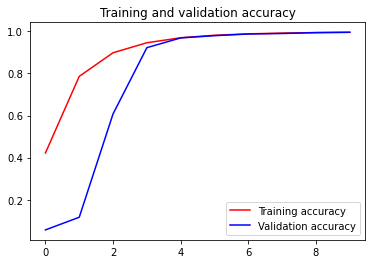

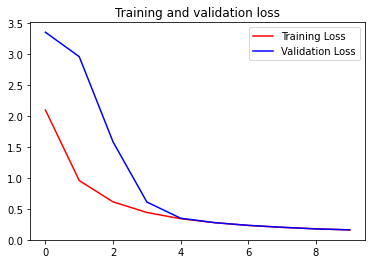

test accuracy: 83.5750162601471
loss: 0.637486457824707
f1_score: 3.1556460857391357
precision: 3.647181749343872
recall: 2.790830135345459
RMSprop
Epoch 1/50
172/172 [==============================] - 18s 104ms/step - loss: 0.2023 - acc: 0.9462 - accuracy: 0.9462 - f1_m: 1.4800 - precision_m: 2.0909 - recall_m: 1.3934 - val_loss: 4.1349 - val_acc: 0.1286 - val_accuracy: 0.1286 - val_f1_m: 10.5048 - val_precision_m: 100.8955 - val_recall_m: 5.5787
Epoch 2/50
172/172 [==============================] - 17s 98ms/step - loss: 0.0086 - acc: 0.9978 - accuracy: 0.9978 - f1_m: 0.9911 - precision_m: 0.9710 - recall_m: 1.0122 - val_loss: 4.3376 - val_acc: 0.1558 - val_accuracy: 0.1558 - val_f1_m: 1.9188 - val_precision_m: 1.9656 - val_recall_m: 1.8749
Epoch 3/50
172/172 [==============================] - 18s 105ms/step - loss: 0.0036 - acc: 0.9991 - accuracy: 0.9991 - f1_m: 0.9832 - precision_m: 0.9631 - recall_m: 1.0042 - val_loss: 0.2658 - val_acc: 0.9283 - val_accuracy: 0.9283 - val_f1_m: 1.3

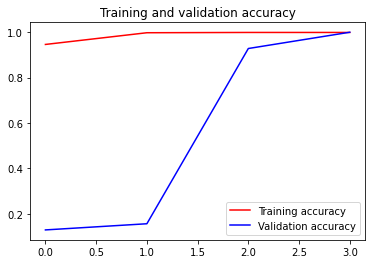

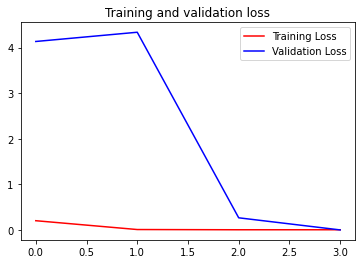

test accuracy: 93.93474459648132
loss: 0.23309345543384552
f1_score: 1.1538337469100952
precision: 1.132656455039978
recall: 1.1766536235809326
Adam
Epoch 1/50
172/172 [==============================] - 18s 105ms/step - loss: 0.1980 - acc: 0.9496 - accuracy: 0.9496 - f1_m: 1.6067 - precision_m: 2.4088 - recall_m: 1.4689 - val_loss: 4.1343 - val_acc: 0.0976 - val_accuracy: 0.0976 - val_f1_m: 10.3939 - val_precision_m: 4023255296.0000 - val_recall_m: 5.2155
Epoch 2/50
172/172 [==============================] - 18s 104ms/step - loss: 0.0021 - acc: 1.0000 - accuracy: 1.0000 - f1_m: 0.9796 - precision_m: 0.9596 - recall_m: 1.0007 - val_loss: 1.7239 - val_acc: 0.4621 - val_accuracy: 0.4621 - val_f1_m: 5.4556 - val_precision_m: 8.9044 - val_recall_m: 3.9441
Epoch 3/50
172/172 [==============================] - 17s 101ms/step - loss: 9.5535e-04 - acc: 1.0000 - accuracy: 1.0000 - f1_m: 0.9790 - precision_m: 0.9590 - recall_m: 1.0000 - val_loss: 0.0578 - val_acc: 0.9940 - val_accuracy: 0.9940 - 

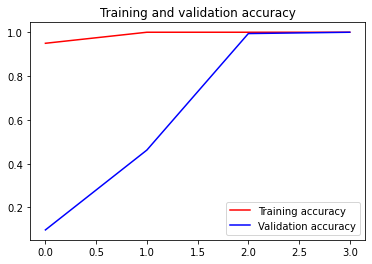

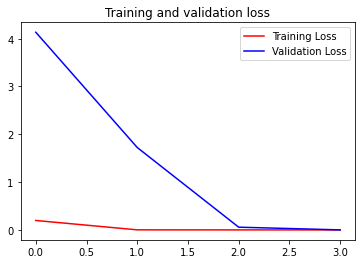

test accuracy: 94.64584589004517
loss: 0.17338146269321442
f1_score: 1.268680214881897
precision: 1.2578057050704956
recall: 1.280069351196289
Adadelta
Epoch 1/50
172/172 [==============================] - 22s 130ms/step - loss: 3.8049 - acc: 0.0562 - accuracy: 0.0562 - f1_m: 12.0517 - precision_m: 121.1957 - recall_m: 6.3976 - val_loss: 3.4948 - val_acc: 0.0416 - val_accuracy: 0.0416 - val_f1_m: 17.9723 - val_precision_m: 10984418304.0000 - val_recall_m: 8.9861
Epoch 2/50
172/172 [==============================] - 18s 107ms/step - loss: 3.3700 - acc: 0.0972 - accuracy: 0.0972 - f1_m: 12.2701 - precision_m: 131.9508 - recall_m: 6.4813 - val_loss: 3.4470 - val_acc: 0.0573 - val_accuracy: 0.0573 - val_f1_m: 17.2381 - val_precision_m: 10531162112.0000 - val_recall_m: 8.6191
Epoch 3/50
172/172 [==============================] - 18s 107ms/step - loss: 3.0337 - acc: 0.1483 - accuracy: 0.1483 - f1_m: 12.2302 - precision_m: 121.6523 - recall_m: 6.4794 - val_loss: 3.1494 - val_acc: 0.1142 - val

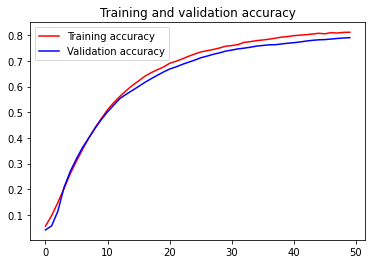

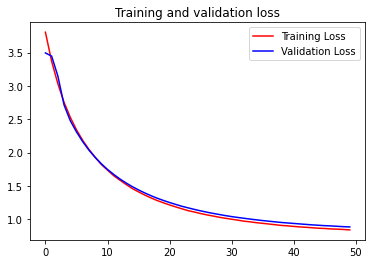

test accuracy: 62.53485679626465
loss: 1.3205305337905884
f1_score: 6.005399703979492
precision: 10.276070594787598
recall: 4.252150535583496
Adagrad
Epoch 1/50
172/172 [==============================] - 18s 104ms/step - loss: 1.3190 - acc: 0.6687 - accuracy: 0.6687 - f1_m: 6.5891 - precision_m: 23.7818 - recall_m: 4.4532 - val_loss: 3.3918 - val_acc: 0.0794 - val_accuracy: 0.0794 - val_f1_m: 17.8165 - val_precision_m: 10891628544.0000 - val_recall_m: 8.9082
Epoch 2/50
172/172 [==============================] - 18s 103ms/step - loss: 0.3783 - acc: 0.9564 - accuracy: 0.9564 - f1_m: 2.6932 - precision_m: 2.8941 - recall_m: 2.5238 - val_loss: 2.7933 - val_acc: 0.1897 - val_accuracy: 0.1897 - val_f1_m: 15.0235 - val_precision_m: 8535815680.0000 - val_recall_m: 7.5159
Epoch 3/50
172/172 [==============================] - 18s 107ms/step - loss: 0.2091 - acc: 0.9888 - accuracy: 0.9888 - f1_m: 1.9281 - precision_m: 1.9410 - recall_m: 1.9162 - val_loss: 1.0596 - val_acc: 0.8031 - val_accuracy: 

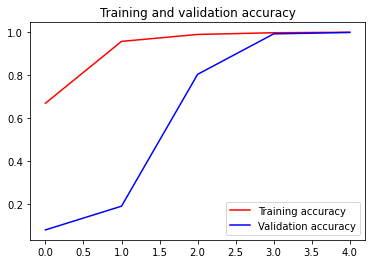

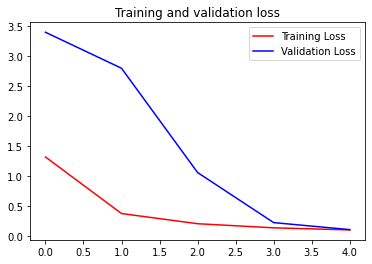

test accuracy: 86.68432831764221
loss: 0.5470567941665649
f1_score: 2.7731165885925293
precision: 3.037863254547119
recall: 2.5542659759521484
Adamax
Epoch 1/50
172/172 [==============================] - 18s 103ms/step - loss: 0.2652 - acc: 0.9398 - accuracy: 0.9398 - f1_m: 1.8684 - precision_m: 2.5275 - recall_m: 1.6937 - val_loss: 3.6920 - val_acc: 0.0619 - val_accuracy: 0.0619 - val_f1_m: 16.1331 - val_precision_m: 9857209344.0000 - val_recall_m: 8.0665
Epoch 2/50
172/172 [==============================] - 18s 103ms/step - loss: 0.0121 - acc: 1.0000 - accuracy: 1.0000 - f1_m: 0.9964 - precision_m: 0.9761 - recall_m: 1.0177 - val_loss: 2.0843 - val_acc: 0.4050 - val_accuracy: 0.4050 - val_f1_m: 8.7869 - val_precision_m: 26.1189 - val_recall_m: 5.3077
Epoch 3/50
172/172 [==============================] - 17s 101ms/step - loss: 0.0064 - acc: 1.0000 - accuracy: 1.0000 - f1_m: 0.9835 - precision_m: 0.9634 - recall_m: 1.0046 - val_loss: 0.1642 - val_acc: 0.9850 - val_accuracy: 0.9850 - va

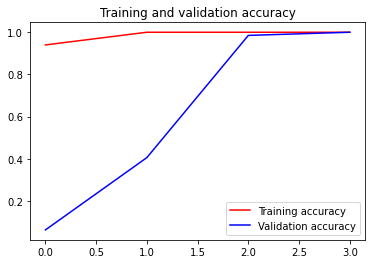

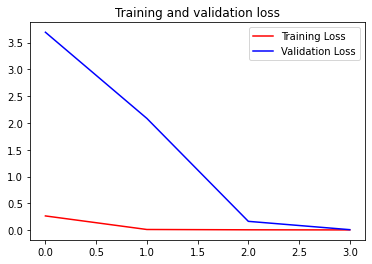

test accuracy: 93.11210513114929
loss: 0.2416285276412964
f1_score: 1.5442029237747192
precision: 1.5495344400405884
recall: 1.5394055843353271
Nadam
Epoch 1/50
172/172 [==============================] - 17s 100ms/step - loss: 0.1727 - acc: 0.9570 - accuracy: 0.9570 - f1_m: 1.5206 - precision_m: 2.1398 - recall_m: 1.3936 - val_loss: 3.8246 - val_acc: 0.1315 - val_accuracy: 0.1315 - val_f1_m: 12.2228 - val_precision_m: 7471395840.0000 - val_recall_m: 6.1114
Epoch 2/50
172/172 [==============================] - 19s 110ms/step - loss: 0.0020 - acc: 1.0000 - accuracy: 1.0000 - f1_m: 0.9794 - precision_m: 0.9594 - recall_m: 1.0004 - val_loss: 1.9182 - val_acc: 0.4656 - val_accuracy: 0.4656 - val_f1_m: 7.3432 - val_precision_m: 15.8949 - val_recall_m: 4.8018
Epoch 3/50
172/172 [==============================] - 17s 100ms/step - loss: 9.3261e-04 - acc: 1.0000 - accuracy: 1.0000 - f1_m: 0.9790 - precision_m: 0.9589 - recall_m: 1.0000 - val_loss: 0.0804 - val_acc: 0.9942 - val_accuracy: 0.9942 

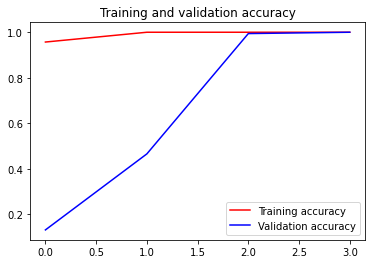

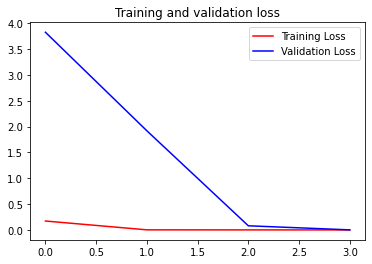

test accuracy: 94.06023621559143
loss: 0.21097396314144135
f1_score: 1.3094266653060913
precision: 1.303809642791748
recall: 1.3176426887512207


In [13]:
optimizers = ['SGD', 'RMSprop', 'Adam', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam']

for optimizer in optimizers:
    print(optimizer)
    model.load_weights('model.h5')
    
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['acc', 'accuracy',f1_m,precision_m, recall_m]) 

    # A lambda function is a small anonymous function.
    learning_rate = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

    trained_model = model.fit(train_generator, epochs=50, validation_data = validation_generator, callbacks = [callback, learning_rate])

    acc = trained_model.history['accuracy']
    val_acc = trained_model.history['val_accuracy']
    loss = trained_model.history['loss']
    val_loss = trained_model.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

    loss, accuracy, acc, f1_score, precision, recall = model.evaluate_generator(test_generator)

    print("test accuracy: "+ str(accuracy * 100))
    print("loss: "+ str(loss))
    print("f1_score: "+ str(f1_score))
    print("precision: "+ str(precision))
    print("recall: "+ str(recall))

<div dir="rtl">
    میتوان مشاهده کرد که بهترین بهینه ساز
adam
می باشد که بیشترین دقت را در کمترین 
epoch
دارد.

</div>
**SGD**

Epoch 9/50

86.16843223571777


**RMSprop**

Epoch 4/50

94.65978741645813


**Adam**

Epoch 4/50

94.81316208839417



**Adadelta**

Epoch 50/50

67.70775318145752



**Adagrad**

Epoch 5/50

87.78583407402039



**Adamax**

Epoch 4/50

95.0362503528595



**Nadam**

Epoch 4/50

94.92470622062683
